# Insurance Statistical Analysis

## 1. Imports

In [3]:
import missingno as msno
import plotly.express as px
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

Deskriptive Analysis

In [ ]:

file_path = "C:\\Users\\Admin\\Desktop\\Statistik\\PP Vers\\20240429_Statistik_Praxisaufgabe_Insurance_Datensatz.csv"
data = pd.read_csv(file_path)

skalenniveau = {
    "age": "Intervallskala",
    "Sex": "Nominalskala",
    "BMI": "Verhältnisskala",
    "Children": "Verhältnisskala",
    "Smoker": "Nominalskala",
    "Region": "Nominalskala",
    "Charges": "Verhältnisskala"
}

# Zusätzliche Umwandlungen und Visualisierungen
data['Age_Group'] = pd.cut(data['age'], bins=[0, 18, 35, 60, np.inf],
                           labels=['Jugendlich', 'Jung', 'Erwachsen', 'Älter'])
data['Sex_Group'] = data['sex']
data['BMI_Group'] = pd.cut(data['bmi'], bins=5,
                           labels=[f'Gruppe {i + 1}' for i in range(5)])
data['Children_Group'] = pd.cut(data['children'], bins=5,
                                labels=[f'Gruppe {i + 1}' for i in range(5)])
data['Smoker_Group'] = data['smoker']
data['Region_Group'] = data['region']
data['Charges_Group'] = pd.cut(data['charges'], bins=5,
                               labels=[f'Gruppe {i + 1}' for i in range(5)])

stats = data.describe()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data['age'], kde=True)
plt.title('Age Verteilung')

plt.subplot(2, 2, 2)
sns.boxplot(data['bmi'])
plt.title('BMI Verteilung')

plt.subplot(2, 2, 3)
sns.histplot(data['children'], kde=True)
plt.title('Children Verteilung')

plt.subplot(2, 2, 4)
sns.histplot(data['charges'], kde=True)
plt.title('Charges Verteilung')

plt.tight_layout()
plt.show()

print("Skalenniveau der Variablen:")
for var, level in skalenniveau.items():
    print(f"{var}: {level}")

print("\nUmgewandelte Variablen, Age_Group):")
print(data[['age', 'Age_Group']].head(10))

print("\nLage- und Streuungsmaße:")
print(stats)

#Skalenniveau der Variablen:
#Die Variable "age" hat ein Intervallskalenniveau, was bedeutet, dass sie 
# numerische Werte enthält, die in einem bestimmten Bereich gemessen werden.
#"Sex" und "Smoker" sind auf Nominalskalenniveau, was darauf hinweist, dass 
# sie kategorische Variablen sind, die keine Rangordnung haben.
#"BMI", "Children" und "Charges" sind auf Verhältnisskala-Niveau, was 
# bedeutet, dass sie numerische Werte haben, bei denen der Abstand zwischen 
# den Werten bedeutungsvoll ist und ein echter Nullpunkt vorhanden ist.
#Umwandlung in niedrigeres Skalenniveau:
#Das Alter wurde in Altersgruppen umgewandelt, um die Analyse zu erleichtern
# und Muster in Bezug auf Altersgruppen zu identifizieren.
#Lage- und Streuungsmaße:
#Die statistischen Kennzahlen zeigen wichtige Informationen über die 
# Verteilung der Daten, wie Mittelwert, Standardabweichung, Minimum, Maximum und verschiedene Perzentile.
#Grafische Darstellungen:
#Die Histogramme und Boxplots geben visuelle Einblicke in die Verteilung und
# die möglichen Ausreißer der Variablen wie Alter, BMI, Anzahl der Kinder und Versicherungskosten (Charges).
#Zusätzliche Umwandlungen und Visualisierungen:
#Es wurden weitere Umwandlungen durchgeführt, um Variablen in Gruppen 
# einzuteilen und diese gruppierten Daten visuell darzustellen.

In [4]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Datacraft\9_Statistik\Praxisprojekt\Projekt 2\20240429_Statistik_Praxisaufgabe_Insurance_Datensatz.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


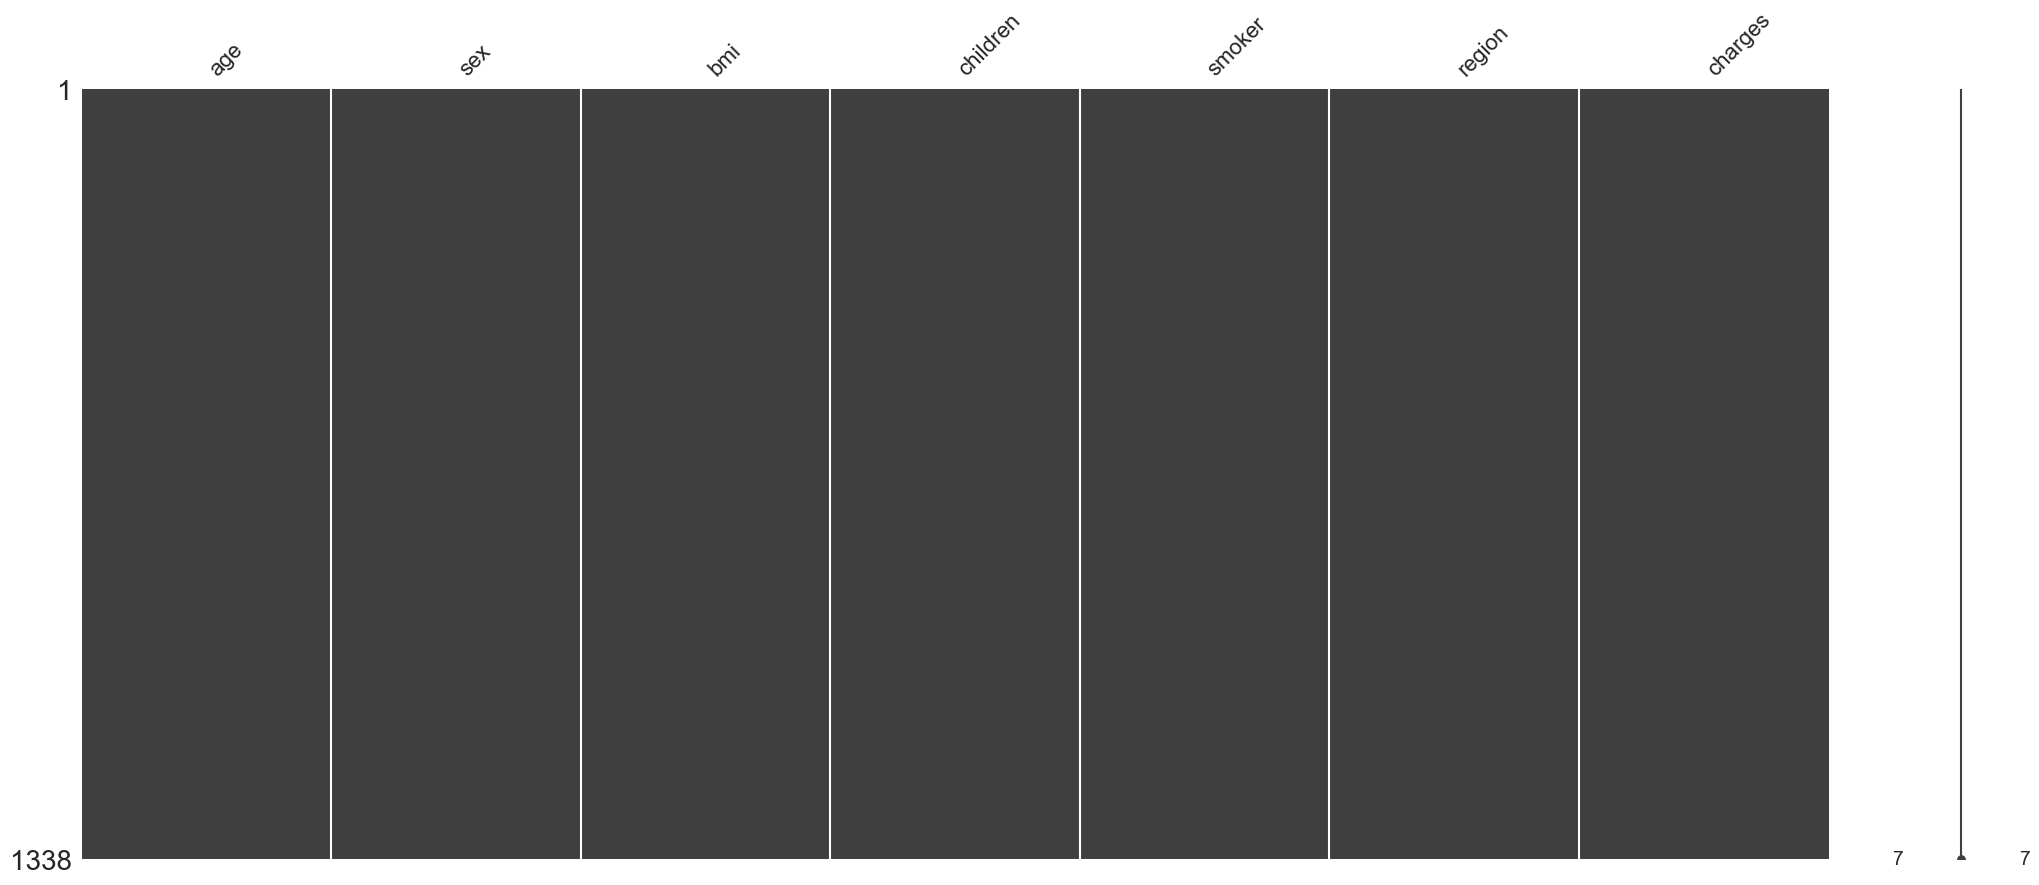

In [144]:
try:
    msno.matrix(data)
except:
    pass

In [139]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
print(f'age (Ratio), Min: {data['age'].min()}, Max: {data['age'].max()}')
print('sex (Nominal): ', data['sex'].unique())
print(f'bmi (Interval), Min: {data['bmi'].min()}, Max: {data['bmi'].max()}')
print(f'children (Ratio), Min: {data['children'].min()}, Max: {data['children'].max()}')
print('smoker (Nominal) ', data['smoker'].unique())
print('region (Nominal) ', data['region'].unique())
print(f'charges (Ratio), Min: {data['charges'].min()}, Max: {data['charges'].max()}')

age (Ratio), Min: 18, Max: 64
sex (Nominal):  ['female' 'male']
bmi (Interval), Min: 15.96, Max: 53.13
children (Ratio), Min: 0, Max: 5
smoker (Nominal)  ['yes' 'no']
region (Nominal)  ['southwest' 'southeast' 'northwest' 'northeast']
charges (Ratio), Min: 1121.8739, Max: 63770.42801


## 3. Bivariate Variable Analysis

### 3.1 Datenvorbereitung

In [6]:
data_south = pd.Series((data['region'] == 'southeast') | (data['region'] == 'southwest'), name='south').astype(int)
data_north = pd.Series((data['region'] == 'northeast') | (data['region'] == 'northwest'), name='north').astype(int)
data_east = pd.Series((data['region'] == 'northeast') | (data['region'] == 'southeast'), name='east').astype(int)
data_west = pd.Series((data['region'] == 'northwest') | (data['region'] == 'southwest'), name='west').astype(int)

#data['region'] = data['region'].replace({'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3})
filtered_data = pd.concat([data, data_north, data_south, data_east, data_west], axis=1)
filtered_data = filtered_data.drop('region', axis=1)

filtered_data['sex'] = data['sex'].replace({'female': 0, 'male': 1})
filtered_data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})
filtered_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_1600\4134085614.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data['sex'] = data['sex'].replace({'female': 0, 'male': 1})
C:\Users\Admin\AppData\Local\Temp\ipykernel_1600\4134085614.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filtered_data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})


,age,sex,bmi,children,smoker,charges,north,south,east,west
0,19,0,27.900,0,1,16884.92400,0,1,0,1
1,18,1,33.770,1,0,1725.55230,0,1,1,0
2,28,1,33.000,3,0,4449.46200,0,1,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0,1
4,32,1,28.880,0,0,3866.85520,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0,1
1334,18,0,31.920,0,0,2205.98080,1,0,1,0
1335,18,0,36.850,0,0,1629.83350,0,1,1,0
1336,21,0,25.800,0,0,2007.94500,0,1,0,1


In [7]:
filtered_data.corr()

,age,sex,bmi,children,smoker,charges,north,south,east,west
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.001772,-0.001772,-0.008245,0.008245
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011651,0.011651,0.013162,-0.013162
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.235113,0.235113,0.122011,-0.122011
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.001735,-0.001735,-0.040086,0.040086
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.029292,0.029292,0.063400,-0.063400
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.028799,0.028799,0.071314,-0.071314
north,0.001772,-0.011651,-0.235113,0.001735,-0.029292,-0.028799,1.000000,-1.000000,-0.029071,0.029071
south,-0.001772,0.011651,0.235113,-0.001735,0.029292,0.028799,-1.000000,1.000000,0.029071,-0.029071
east,-0.008245,0.013162,0.122011,-0.040086,0.063400,0.071314,-0.029071,0.029071,1.000000,-1.000000
west,0.008245,-0.013162,-0.122011,0.040086,-0.063400,-0.071314,0.029071,-0.029071,-1.000000,1.000000


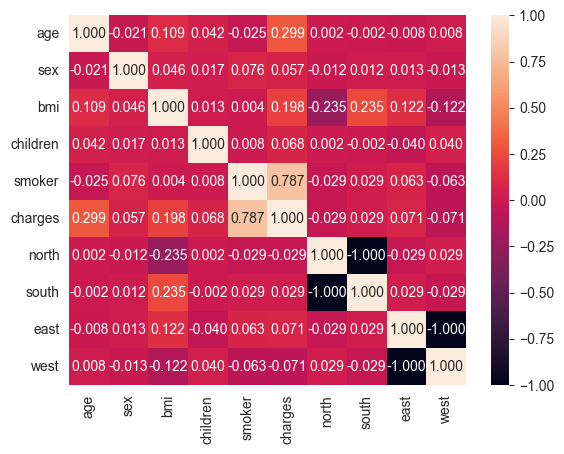

In [8]:
sns.heatmap(filtered_data.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            fmt='.3f'
            );

### 3.2 Age & Charges

In [149]:
px.scatter(x=filtered_data['age'],
           y=filtered_data['charges'],
           trendline='ols')

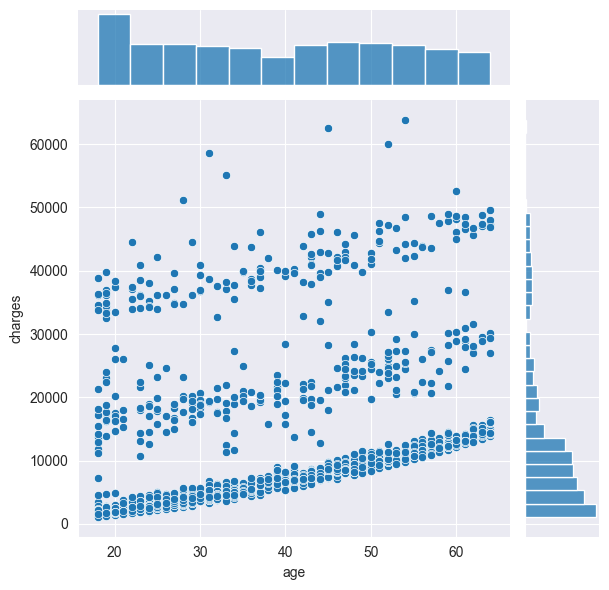

In [152]:
sns.jointplot(x=filtered_data['age'],
              y=filtered_data['charges']);

In [151]:
stats.ttest_rel(data['age'], data['charges'])

TtestResult(statistic=-39.97915998730124, pvalue=1.4467163879661161e-230, df=1337)

### 3.3 Sex & Charges

In [153]:
px.box(x=filtered_data['sex'],
       y=filtered_data['charges'])

In [160]:
filtered_data['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [14]:
stats.ttest_ind(filtered_data.charges[filtered_data.sex==1], filtered_data.charges[filtered_data.sex==0], equal_var = True)

TtestResult(statistic=2.097546590051688, pvalue=0.03613272100592976, df=1336.0)

In [13]:
rp.ttest(filtered_data.charges[filtered_data['sex'] == 1],filtered_data.charges[filtered_data['sex'] == 0], paired=False, equal_variances=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'charges' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (charges - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   676.0  13956.751178  12971.025915  498.885612  12977.196929   
 1   charges   662.0  12569.578844  11128.703801  432.529356  11720.281775   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  14936.305426  
 1  13418.875912  
 2  13919.890496  ,
                   Independent t-test    results
 0  Difference (charges - charges) =   1387.1723
 1              Degrees of freedom =   1336.0000
 2                               t =      2.0975
 3           Two side test p value =      0.0361
 4          Difference < 0 p value =      0.9819
 5          Difference > 0 p value =      0.0181
 6                       Cohen's d =      0.1147
 7                       Hedge's g =      0.1146
 8                  Glass's delta1 =      0.1069
 9                Point-Biserial r =      0.0573)

### 3.4 BMI & Charges

In [114]:
px.scatter(x=filtered_data['bmi'],
           y=filtered_data['charges'],
           trendline='ols')

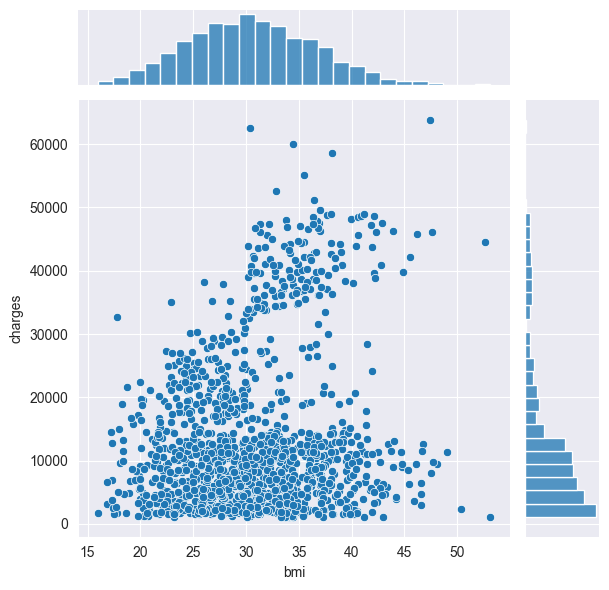

In [115]:
sns.jointplot(x=filtered_data['bmi'],
              y=filtered_data['charges']);

In [18]:
stats.ttest_rel(filtered_data['bmi'], filtered_data['charges'])

TtestResult(statistic=-39.99511148430065, pvalue=1.0818204227392624e-230, df=1337)

In [15]:
rp.ttest(filtered_data["bmi"], filtered_data["charges"], paired=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'bmi' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:419: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (bmi - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(  Variable       N          Mean            SD          SE     95% Conf.  \
 0      bmi  1338.0     30.663397      6.098187    0.166714     30.336347   
 1  charges  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 2     diff  1338.0 -13239.758868  12108.803192  331.034428 -13889.162311   
 
        Interval  
 0     30.990447  
 1  13919.890496  
 2 -12590.355426  ,
             Paired samples t-test     results
 0   Difference (bmi - charges) =  -13239.7589
 1           Degrees of freedom =    1337.0000
 2                            t =     -39.9951
 3        Two side test p value =       0.0000
 4       Difference < 0 p value =       0.0000
 5       Difference > 0 p value =       1.0000
 6                    Cohen's d =      -1.0934
 7                 Cohen's d_av =      -2.1855
 8                    Hedge's g =      -1.0931
 9               Glass's delta1 =   -2171.0976
 10            Point-Biserial r =      -0.7380)

### 3.5 Children & Charges

In [116]:
px.box(x=filtered_data['children'],
       y=filtered_data['charges'])

In [19]:
stats.ttest_rel(filtered_data['children'], filtered_data['charges'])

TtestResult(statistic=-40.08070539160361, pvalue=2.2746122345300297e-231, df=1337)

In [16]:
rp.ttest(filtered_data["children"], filtered_data["charges"], paired=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'children' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:419: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (children - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0  children  1338.0      1.094918      1.205493    0.032956      1.030266   
 1   charges  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 2      diff  1338.0 -13269.327347  12109.929325  331.065215 -13918.791185   
 
        Interval  
 0      1.159569  
 1  13919.890496  
 2 -12619.863509  ,
                  Paired samples t-test     results
 0   Difference (children - charges) =  -13269.3273
 1                Degrees of freedom =    1337.0000
 2                                 t =     -40.0807
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       0.0000
 5            Difference > 0 p value =       1.0000
 6                         Cohen's d =      -1.0957
 7                      Cohen's d_av =      -2.1912
 8                         Hedge's g =      -1.0954
 9                    Glass's delta1 =  -11007.3889
 10                 Point-Biserial r 

### 3.6 Smoker & Charges

In [117]:
px.box(x=filtered_data['smoker'],
       y=filtered_data['charges'])

In [20]:
stats.ttest_rel(filtered_data['smoker'], filtered_data['charges'])

TtestResult(statistic=-40.084174906876314, pvalue=2.1352966038015153e-231, df=1337)

In [22]:
rp.ttest(filtered_data.charges[filtered_data['smoker'] == 1],filtered_data.charges[filtered_data['smoker'] == 0], paired=False, equal_variances=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'charges' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (charges - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   274.0  32050.231832  11541.547176  697.250364  30677.560883   
 1   charges  1064.0   8434.268298   5993.781819  183.751171   8073.712088   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  33422.902780  
 1   8794.824508  
 2  13919.890496  ,
                   Independent t-test     results
 0  Difference (charges - charges) =   23615.9635
 1              Degrees of freedom =    1336.0000
 2                               t =      46.6649
 3           Two side test p value =       0.0000
 4          Difference < 0 p value =       1.0000
 5          Difference > 0 p value =       0.0000
 6                       Cohen's d =       3.1613
 7                       Hedge's g =       3.1596
 8                  Glass's delta1 =       2.0462
 9                Point-Biserial r =       0.7873)

### 3.7 Region & Charges

In [127]:
melted_data = pd.melt(filtered_data, id_vars=['charges'], value_vars=['north', 'south', 'east', 'west'], 
                      var_name='location')

px.box(melted_data, x='location', y='charges')

In [28]:
rp.ttest(filtered_data.charges[filtered_data['north'] == 1],filtered_data.charges[filtered_data['north'] == 0], paired=False, equal_variances=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'charges' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (charges - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   649.0  12911.218151  11166.624735  438.328363  12050.502715   
 1   charges   689.0  13608.772730  12934.889050  492.780027  12641.239543   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  13771.933587  
 1  14576.305917  
 2  13919.890496  ,
                   Independent t-test    results
 0  Difference (charges - charges) =   -697.5546
 1              Degrees of freedom =   1336.0000
 2                               t =     -1.0531
 3           Two side test p value =      0.2925
 4          Difference < 0 p value =      0.1463
 5          Difference > 0 p value =      0.8537
 6                       Cohen's d =     -0.0576
 7                       Hedge's g =     -0.0576
 8                  Glass's delta1 =     -0.0625
 9                Point-Biserial r =     -0.0288)

In [30]:
rp.ttest(filtered_data.charges[filtered_data['south'] == 1],filtered_data.charges[filtered_data['south'] == 0], paired=False, equal_variances=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'charges' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (charges - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   689.0  13608.772730  12934.889050  492.780027  12641.239543   
 1   charges   649.0  12911.218151  11166.624735  438.328363  12050.502715   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  14576.305917  
 1  13771.933587  
 2  13919.890496  ,
                   Independent t-test    results
 0  Difference (charges - charges) =    697.5546
 1              Degrees of freedom =   1336.0000
 2                               t =      1.0531
 3           Two side test p value =      0.2925
 4          Difference < 0 p value =      0.8537
 5          Difference > 0 p value =      0.1463
 6                       Cohen's d =      0.0576
 7                       Hedge's g =      0.0576
 8                  Glass's delta1 =      0.0539
 9                Point-Biserial r =      0.0288)

In [31]:
rp.ttest(filtered_data.charges[filtered_data['east'] == 1],filtered_data.charges[filtered_data['east'] == 0], paired=False, equal_variances=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'charges' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (charges - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   688.0  14109.532481  12772.742098  486.956227  13153.431394   
 1   charges   650.0  12382.256376  11308.658156  443.562066  11511.266385   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  15065.633567  
 1  13253.246367  
 2  13919.890496  ,
                   Independent t-test    results
 0  Difference (charges - charges) =   1727.2761
 1              Degrees of freedom =   1336.0000
 2                               t =      2.6133
 3           Two side test p value =      0.0091
 4          Difference < 0 p value =      0.9955
 5          Difference > 0 p value =      0.0045
 6                       Cohen's d =      0.1429
 7                       Hedge's g =      0.1429
 8                  Glass's delta1 =      0.1352
 9                Point-Biserial r =      0.0713)

In [32]:
rp.ttest(filtered_data.charges[filtered_data['west'] == 1],filtered_data.charges[filtered_data['west'] == 0], paired=False, equal_variances=True)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'charges' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (charges - charges) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable       N          Mean            SD          SE     95% Conf.  \
 0   charges   650.0  12382.256376  11308.658156  443.562066  11511.266385   
 1   charges   688.0  14109.532481  12772.742098  486.956227  13153.431394   
 2  combined  1338.0  13270.422265  12110.011237  331.067454  12620.954034   
 
        Interval  
 0  13253.246367  
 1  15065.633567  
 2  13919.890496  ,
                   Independent t-test    results
 0  Difference (charges - charges) =  -1727.2761
 1              Degrees of freedom =   1336.0000
 2                               t =     -2.6133
 3           Two side test p value =      0.0091
 4          Difference < 0 p value =      0.0045
 5          Difference > 0 p value =      0.9955
 6                       Cohen's d =     -0.1429
 7                       Hedge's g =     -0.1429
 8                  Glass's delta1 =     -0.1527
 9                Point-Biserial r =     -0.0713)

## 4 Lineare Regression

In [11]:
# Lineare Regression
model = smf.ols(formula='charges ~ age + sex + bmi + children + smoker + region', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        10:24:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
sex[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                   256.8564     11.899     21.587      0.000     233.514     280.199
bmi                   339.1935     28.599     11.860      0.000     283.088     395.298
children              475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Sex ist nicht signifikant
model1 = smf.ols(formula='charges ~ age + bmi + children + smoker + region', data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        10:50:05   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
smoker[T.yes]        2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
region[T.northwest]  -352.1821    476.120     -0.740      0.460   -1286.211     581.847
region[T.southeast] -1034.3601    478.537     -2.162      0.031   -1973.130     -95.590
region[T.southwest]  -959.3747    477.778     -2.008      0.045   -1896.656     -22.094
age                   256.9736     11.891     21.610      0.000     233.646     280.301
bmi                   338.6646     28.559     11.858      0.000     282.639     394.690
children              474.5665    137.740      3.445      0.001     204.355     744.778
==============================================================================
Omnibus:                      300.735   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.516
Skew:                           1.212   Prob(JB):                    3.48e-157
Kurtosis:                       5.654   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Daten für southeast und southwest filtern
data_filtered = data[(data['region'] == 'southeast') | (data['region'] == 'southwest')]

model2 = smf.ols(formula='charges ~ age + bmi + children + smoker + region', data=data_filtered).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     527.4
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.02e-231
Time:                        10:50:23   Log-Likelihood:                -6955.6
No. Observations:                 689   AIC:                         1.392e+04
Df Residuals:                     683   BIC:                         1.395e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.268e+04   1374.171     -9.226      0.000   -1.54e+04   -9980.267
smoker[T.yes]        2.605e+04    547.196     47.600      0.000     2.5e+04    2.71e+04
region[T.southwest]   146.5463    462.942      0.317      0.752    -762.414    1055.507
age                   272.0776     16.086     16.914      0.000     240.494     303.661
bmi                   301.8694     36.908      8.179      0.000     229.402     374.336
children              227.2183    183.698      1.237      0.217    -133.462     587.899
==============================================================================
Omnibus:                      131.175   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.289
Skew:                           0.936   Prob(JB):                     1.95e-82
Kurtosis:                       6.099   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Daten für northwest und northeast filtern
data_filtered1 = data[(data['region'] == 'northwest') | (data['region'] == 'northeast')]

model3 = smf.ols(formula='charges ~ age + bmi + children + smoker + region', data=data_filtered1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     309.6
Date:                Thu, 02 May 2024   Prob (F-statistic):          1.73e-168
Time:                        10:50:37   Log-Likelihood:                -6571.7
No. Observations:                 649   AIC:                         1.316e+04
Df Residuals:                     643   BIC:                         1.318e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.239e+04   1413.657     -8.764      0.000   -1.52e+04   -9613.668
smoker[T.yes]         2.13e+04    605.425     35.181      0.000    2.01e+04    2.25e+04
region[T.northwest]  -456.0110    477.525     -0.955      0.340   -1393.708     481.686
age                   241.9870     17.138     14.120      0.000     208.334     275.640
bmi                   379.9697     43.423      8.750      0.000     294.702     465.237
children              768.4391    201.595      3.812      0.000     372.575    1164.303
==============================================================================
Omnibus:                      186.011   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              438.840
Skew:                           1.506   Prob(JB):                     5.09e-96
Kurtosis:                       5.674   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Einteilung des Alters in Altersklassen
data_age = data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-29', '30-39', '40-49', '50-59', '60-69'])
data_age

0       18-29
1         NaN
2       18-29
3       30-39
4       30-39
        ...  
1333    40-49
1334      NaN
1335      NaN
1336    18-29
1337    60-69
Name: age, Length: 1338, dtype: category
Categories (5, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69']

In [46]:
# Lineare Regression mit den Altersgruppen
model_age_groups = smf.ols(formula='charges ~ age_group + bmi + children + smoker + region', data=data).fit()
model_age_groups.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     372.9
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        11:45:56   Log-Likelihood:                -12858.
No. Observations:                1269   AIC:                         2.574e+04
Df Residuals:                    1258   BIC:                         2.579e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5326.3328    967.961     -5.503      0.000   -7225.329   -3427.337
age_group[T.30-39]   1398.2888    503.581      2.777      0.006     410.337    2386.241
age_group[T.40-49]   4321.8268    489.084      8.837      0.000    3362.317    5281.337
age_group[T.50-59]   8054.7995    494.823     16.278      0.000    7084.030    9025.569
age_group[T.60-69]   9949.0127    720.174     13.815      0.000    8536.138    1.14e+04
smoker[T.yes]        2.385e+04    426.321     55.947      0.000     2.3e+04    2.47e+04
region[T.northwest]  -596.0544    493.822     -1.207      0.228   -1564.860     372.751
region[T.southeast] -1094.8364    507.543     -2.157      0.031   -2090.560     -99.113
region[T.southwest] -1185.3488    495.487     -2.392      0.017   -2157.421    -213.276
bmi                   338.2671     29.837     11.337      0.000     279.731     396.803
children              664.6514    145.824      4.558      0.000     378.567     950.736
==============================================================================
Omnibus:                      278.829   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.155
Skew:                           1.193   Prob(JB):                    1.48e-142
Kurtosis:                       5.580   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""